<h1><center> Understanding Income Unequality </center></h1>
   
   
   
<h4><center>Quyen Hoang</center></h4>
   
   
<h4><center>College of Professional Studies, Northeastern University</center></h4>
  
<h4><center> ALY 6020: Predictive Analytics </center></h4>
<h4><center>Professor Vladimir Shapiro </center></h4>

<h4><center>April 16 2023</center></h4>

# Introduction

   
  We have been given census data about attributes of US citizens (occupation, education, gender, race). With organizations working to ensure equal pay, we want to build a model to see how accurately we can classify low-income (<= 50k dollars)from high-income (> 50k dollars) citizens. Building this model will allow us to understand which attributes contribute to affluency and how we can improve policies in the US. We will use the income column to see if we can accurately group these individuals into groups.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Loading the dataset
df=pd.read_csv('adult-all.csv')

### Data Overview

In [3]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


   All the variables are not in the proper names.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   39             48841 non-null  int64 
 1   State-gov      48841 non-null  object
 2   77516          48841 non-null  int64 
 3   Bachelors      48841 non-null  object
 4   13             48841 non-null  int64 
 5   Never-married  48841 non-null  object
 6   Adm-clerical   48841 non-null  object
 7   Not-in-family  48841 non-null  object
 8   White          48841 non-null  object
 9   Male           48841 non-null  object
 10  2174           48841 non-null  int64 
 11  0              48841 non-null  int64 
 12  40             48841 non-null  int64 
 13  United-States  48841 non-null  object
 14  <=50K          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Body/Analysis

### Task 1:

Use proper data cleansing techniques to ensure you have the highest quality data to model this problem. Detail your process and discuss the decisions you made to clean the data. This includes the following:

- A. Checking if there are missing or bad values.
- B. Checking for outliers.
- C. Checking for data types and making sure they are correct.


### Data Cleansing

#### Rename attributes

In [5]:
# Rename the attributes
df.rename(columns = {'39':'age', 'State-gov': 'workclass', 'Bachelors':'education', 
                     '13':'education_num','Never-married':'marital_status','Adm-clerical':'occupation',
                    'Not-in-family':'relationship', 'White':'race','Male':'sex', '2174':'capital_gain',
                    '0': 'capital_loss', '40':'hour_per_week', 'United-States': 'native_country', '<=50K': 'salary'}, inplace = True)

df=df.drop(['77516'], axis = 1)


 - I changed the attributes names into their proper ones based on the data content for the convenience of our analysis.
 - Column ‘77516’ has data that is unexplainable so I just dropped it. 

In [6]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hour_per_week,native_country,salary
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


#### A. Checking Missing or Bad  values

- The missing values of this dataset are in the form of  ‘?’ instead of nan like usual. I found out by looking at the unique values of each variable. There are missing values in 3 columns which are ‘workclass’, ‘occupation’, and ‘native-country’, making up around 13% of the dataset.
- I am going to replace the '?' by nan and fill the missing values but their mode.

In [7]:
# Count unique values of categorical attributes
cat_col = df.select_dtypes(exclude='number')
num_col = df.select_dtypes(include = 'number')
lst = cat_col.columns
for i in range(9):
    print(cat_col[lst[i]].value_counts()/len(cat_col[lst[i]])*100)
    print('----------------------------------')

Private             69.421183
Self-emp-not-inc     7.907291
Local-gov            6.420835
?                    5.730841
State-gov            4.053971
Self-emp-inc         3.470445
Federal-gov          2.931963
Without-pay          0.042997
Never-worked         0.020475
Name: workclass, dtype: float64
----------------------------------
HS-grad         32.317111
Some-college    22.272271
Bachelors       16.428820
Masters          5.440102
Assoc-voc        4.219815
11th             3.709998
Assoc-acdm       3.277984
10th             2.843922
7th-8th          1.955324
Prof-school      1.707582
9th              1.547880
12th             1.345181
Doctorate        1.216191
5th-6th          1.042157
1st-4th          0.505723
Preschool        0.169939
Name: education, dtype: float64
----------------------------------
Married-civ-spouse       45.820110
Never-married            32.996867
Divorced                 13.580803
Separated                 3.132614
Widowed                   3.108044
Marri

In [8]:
## Replace '?' by nan 
df.replace({'?':np.nan}, inplace= True)
df.isna().sum()/len(df)*100

age               0.000000
workclass         5.730841
education         0.000000
education_num     0.000000
marital_status    0.000000
occupation        5.751315
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
capital_loss      0.000000
hour_per_week     0.000000
native_country    1.754673
salary            0.000000
dtype: float64

   I am replacing the '?' values by nan and check the percentage of nan of each column. 


In [9]:
#Handling missing values
#df.dropna(axis=0, how='any', inplace=True)
# df.fillna(df.mode(), inplace = True)
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
df['native_country'] = df['native_country'].fillna(df['native_country'].mode()[0])
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])

   I am filling all the missing values with their mode. 

In [10]:
df.isna().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hour_per_week     0
native_country    0
salary            0
dtype: int64

#### B. Checking for Outliers

In [11]:
df.describe()

,age,education_num,capital_gain,capital_loss,hour_per_week
count,48841.000000,48841.000000,48841.000000,48841.000000,48841.000000
mean,38.643578,10.078029,1079.045208,87.504105,40.422391
std,13.710650,2.570965,7452.093700,403.008483,12.391571
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


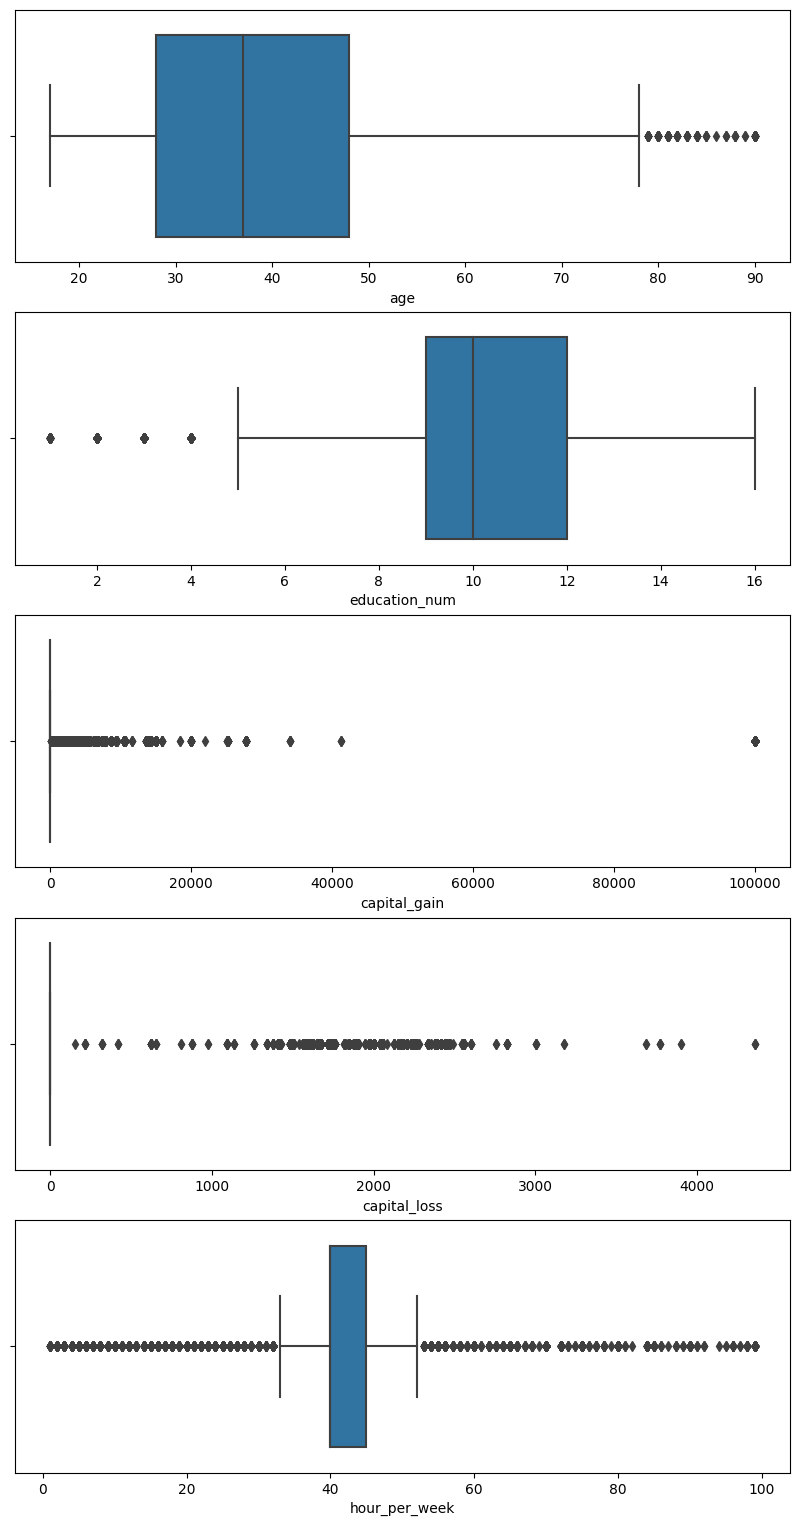

In [12]:
# Boxplot for numeric columns
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,19))
for i in enumerate(num_col.columns):
    plt.subplot(5,1,i[0]+1)
    sns.boxplot(i[1], data=df)

- Education-num: outliers are those who have education_num < 4, which makes sense to me as there are a lot of people who have a low education level in the community. So I will keep these outliers. 
    
- Capital-gain: 91% of the data is 0 so I will not drop this column but I still keep this column in case those available values pointing an interesting pattern. 
    
- Capital-loss: 95% of the data is 0 so I will also keep this column. 
    
- Hour-per-week: half of the dataset gathers around 40 hours/week which is the standard for a full-time job which makes the interquartile range small. As a results, there a lot of data points are considered outliers, however,  those data still make sense in the context so I am keeping them. To be specific, we still have people who are working 60-100 hours per week and those of data only make up 2% of the dataset which should be considered as natural variations. I am keeping these outliers. 


In [13]:
## Hour_per_week
df['hour_per_week'].value_counts()/len(df)*100

40    46.686186
50     8.693516
45     5.562949
60     4.457321
35     3.965930
        ...    
94     0.002047
82     0.002047
87     0.002047
79     0.002047
69     0.002047
Name: hour_per_week, Length: 96, dtype: float64

In [14]:
df[df['hour_per_week']>70].age.count()/len(df)*100

1.584734137302676

In [15]:
## Capital_gain
df['capital_gain'].value_counts()/len(df)*100

0        91.740546
15024     1.050347
7688      0.839459
7298      0.745275
99999     0.499580
           ...    
22040     0.002047
2387      0.002047
1639      0.002047
1111      0.002047
6612      0.002047
Name: capital_gain, Length: 123, dtype: float64

In [16]:
## Capital_loss
df['capital_loss'].value_counts()/len(df)*100

0       95.327696
1902     0.622428
1977     0.518007
1887     0.477058
2415     0.147417
          ...    
1539     0.002047
1870     0.002047
1911     0.002047
2465     0.002047
1421     0.002047
Name: capital_loss, Length: 99, dtype: float64

####  C. Checking for Data types

In [17]:
# Checking for data types
df.dtypes

age                int64
workclass         object
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hour_per_week      int64
native_country    object
salary            object
dtype: object

All columns are in there suitable types. 

### TASK 2: Designate a dependent variable that would be useful to separate the individuals by income.

   Salary (>50k, <=50k) used as the dependent variable to separate individuals by income. 

### TASK 3: Data Exploratory

Perform exploratory analysis on the dataset. Look at correlations, and train/test split your dataset. When looking at the correlations, look for interesting/telling relationships. For Example: Is there a relationship between gender and income?

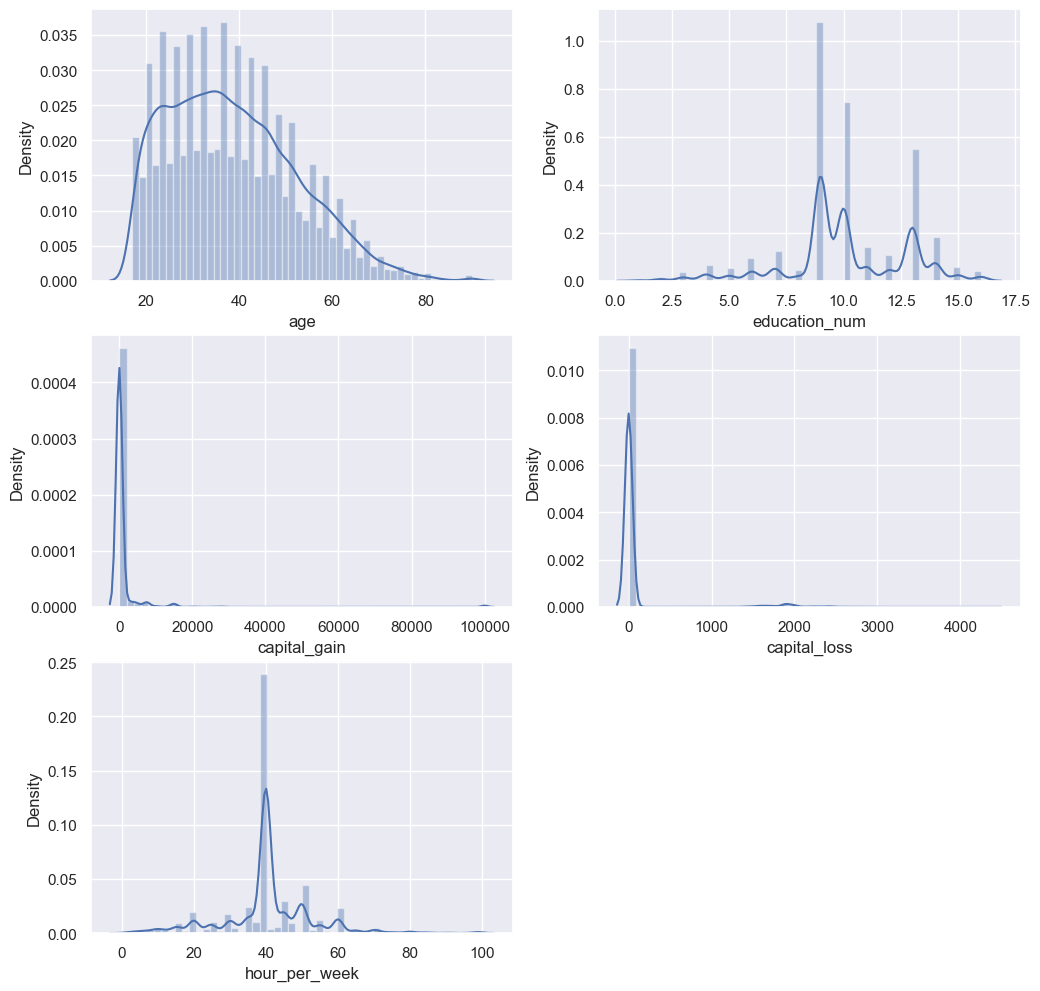

In [18]:
#Histogram
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,12))
sns.set(style='darkgrid')
for i in enumerate(num_col.columns):
    plt.subplot(3,2,i[0]+1)
    sns.distplot(df[i[1]])

- Age distribution is right skewed. The majority of the population are from 20-50 years old.
- Education-num unevenly distribute from 0 - 17 and get its peak at around 9. 
- Capital gain and capital lost have around 91% of there value at 0.
- Hour-per-week get the highest density at 40 hours which is the standard for full-time employeees. 

### Correlation

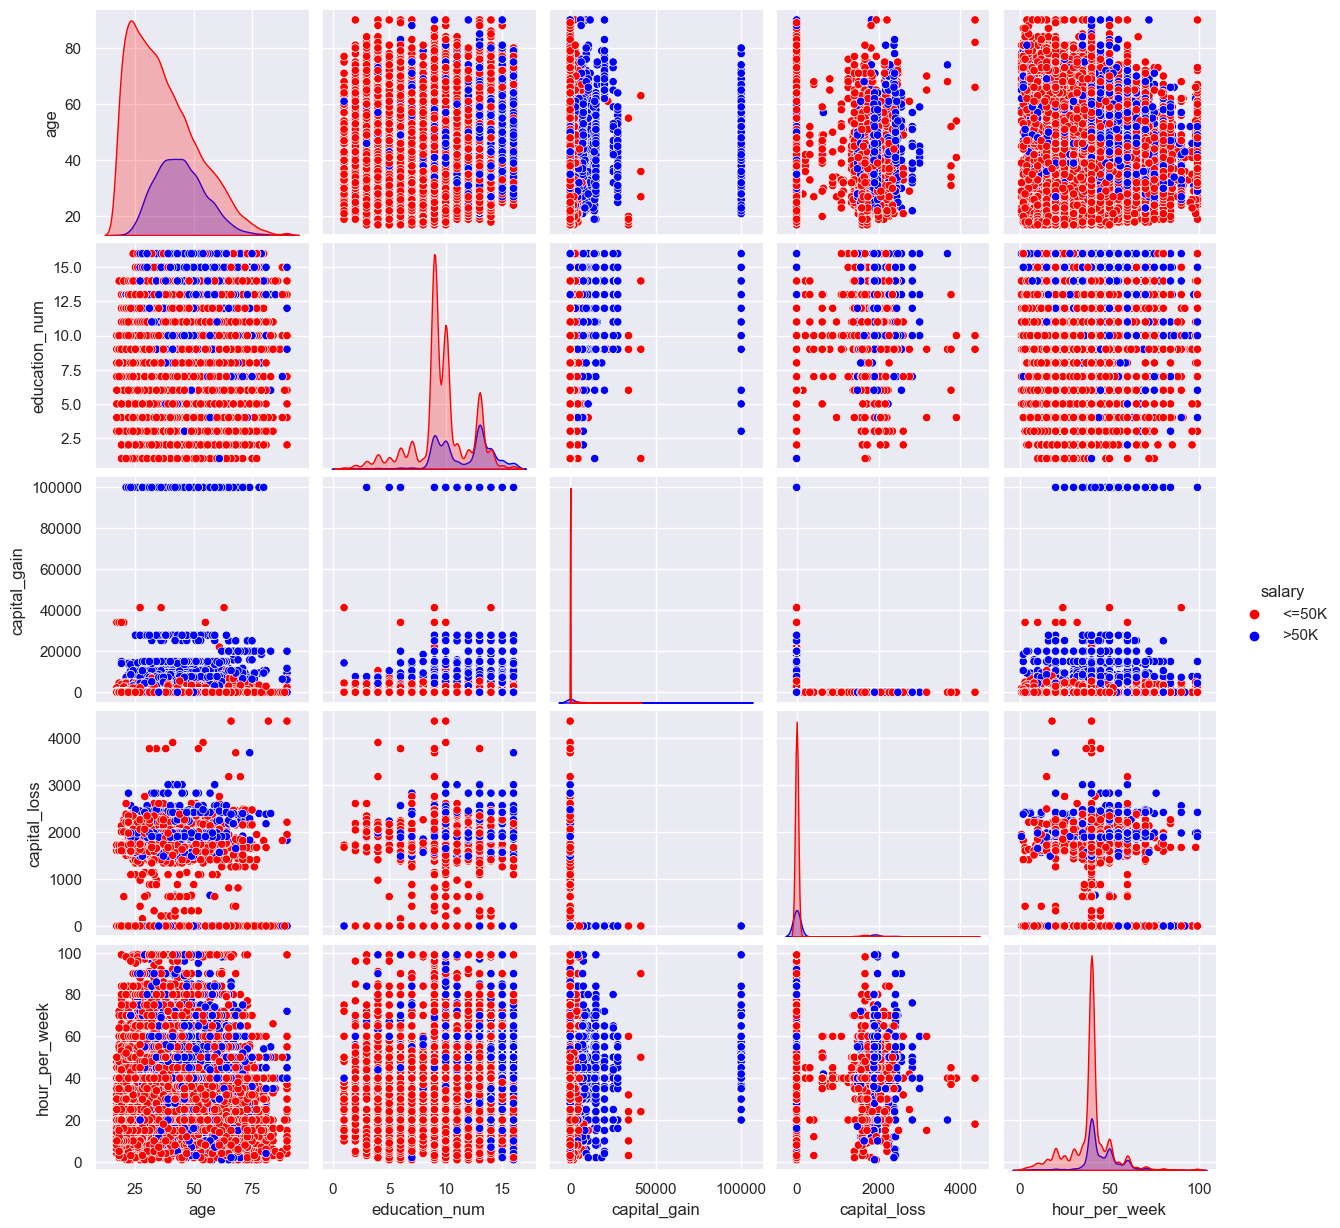

In [19]:
##Pairplot numeric variables. 
sns.pairplot(data = df, hue = 'salary', palette = ['Red', 'Blue'])
plt.savefig('pairplot.png')

Althought there is not a clear distinct pattern created by the salary in the data, we can still notice that salary have a positive relationship with the independent numeric variables showing by the >50k sections are in the right side of the plots. 

In [20]:
## Correlation matrix numeric variables. 
df['sex'] = np.where(df['sex'] == 'Female',0,1)
df['salary'] = np.where(df['salary'] == '>50K',1,0)
df.corr()

,age,education_num,sex,capital_gain,capital_loss,hour_per_week,salary
age,1.000000,0.030940,0.088120,0.077229,0.056944,0.071558,0.230371
education_num,0.030940,1.000000,0.009312,0.125145,0.080978,0.143692,0.332632
sex,0.088120,0.009312,1.000000,0.047092,0.045484,0.228561,0.214638
capital_gain,0.077229,0.125145,0.047092,1.000000,-0.031440,0.082157,0.223015
capital_loss,0.056944,0.080978,0.045484,-0.031440,1.000000,0.054467,0.147553
hour_per_week,0.071558,0.143692,0.228561,0.082157,0.054467,1.000000,0.227687
salary,0.230371,0.332632,0.214638,0.223015,0.147553,0.227687,1.000000


<Axes: >

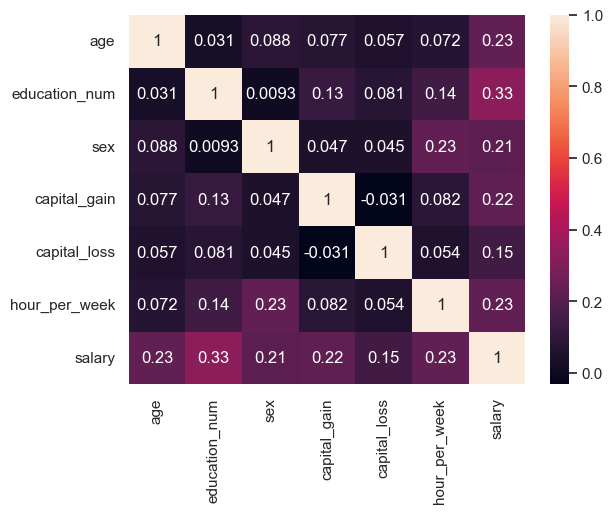

In [21]:
sns.heatmap(df.corr(), annot=True)

Target variable (salary) has positive relationship with numeric predictors. 
- Male employees are likely to have higher salary compared to female
- People who have higher in hour-per-week tend to get more salary than those do not. 
- The highest correlation with is education_num (corr=0.33) - as the value of education_num increase, there are more likely that people get a salary >50k.

#### Data Transformation

I am going to convert categorical data into numbers which are suitable for the model. 

In [22]:
cat_col = df.select_dtypes(exclude='number')
cat_col.columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'native_country'],
      dtype='object')

In [23]:
DF = pd.get_dummies(data= df, columns = ['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'native_country'], drop_first = True)


In [24]:
DF.head()


,age,education_num,sex,capital_gain,capital_loss,hour_per_week,salary,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,50,13,1,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,1,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,53,7,1,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,28,13,0,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,37,14,0,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [25]:
# Create correlation matrix categorical data
corr_mat = DF.corr(method='pearson')
  
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
upper_corr_mat = corr_mat.where(
    np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values()


In [26]:
## Variable-pair that have correlation larger than 0.3
sorted_mat[abs(sorted_mat)>0.3]

race_White                         race_Black                          -0.791095
marital_status_Never-married       marital_status_Married-civ-spouse   -0.645354
relationship_Not-in-family         marital_status_Married-civ-spouse   -0.539560
marital_status_Never-married       age                                 -0.538262
workclass_Self-emp-not-inc         workclass_Private                   -0.509596
native_country_United-States       native_country_Mexico               -0.462256
workclass_Private                  workclass_Local-gov                 -0.455545
race_White                         race_Asian-Pac-Islander             -0.435127
relationship_Own-child             age                                 -0.432991
                                   marital_status_Married-civ-spouse   -0.377964
education_Some-college             education_HS-grad                   -0.369889
workclass_State-gov                workclass_Private                   -0.357480
native_country_United-States

   Categorical attributes: salary is correlated with some variables. 
- Salary and marital_status_Married-civ-spouse: 0.45 - people who are ‘married and has spouse’ are likely to have income >50k.
- Salary and relationship_husband: 0.4 - people who are a husband tend to earn >50k
- Salary and marital_status_Never-married: -0.3  - people in ‘never-married’ tend to have lower salary


#### Test/train split dataset

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
## Split train and test set
X = DF.drop(['salary'], axis = 1)
y = DF['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

In [ ]:
print(f'x_train shape: {X_train.shape}')
print(f'x_test shape: {X_test.shape}')

### TASK 4: Buidling the modeling

Build three nearest neighbor models with the given data, using K= 3, 7, 10. Interpret the results, and convey those results to stakeholders. Key points to focus on are:

- Accuracy between the models (was one more accurate than the other).
- Ultimately, would you recommend the US government use this model to understand if the pay is equal? This should be a minimum. paragraph discussion and should require outside reading about the current state of equal pay and if the distribution of pay is based on the factors in the dataset.

In [28]:
## Standardizing the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#### A. Accuracy between the models -  k = 3,5,7 (was one more accurate than the other).

In [29]:
### Fit the model k = 3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_std, y_train)
### Fit the model k = 5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_std, y_train)
### Fit the model k = 7
knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=7)

In [30]:
print(f'k =3 , Accuracy score {knn3.score(X_test_std,y_test)}')
print(f'k =5 , Accuracy score {knn5.score(X_test_std,y_test)}')
print(f'k =7 , Accuracy score {knn7.score(X_test_std,y_test)}')


k =3 , Accuracy score 0.8221524602470484
k =5 , Accuracy score 0.8289770012966629
k =7 , Accuracy score 0.8317068177165086


Acccuracy: 
There is slight difference between the accuracy of 3 models. k = 7 has the highest accuracy score of 82,24%

In [31]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
y_test_pred = knn7.predict(X_test_std)
cfm = confusion_matrix(y_test, y_test_pred)
cfm

array([[10194,   972],
       [ 1494,  1993]])

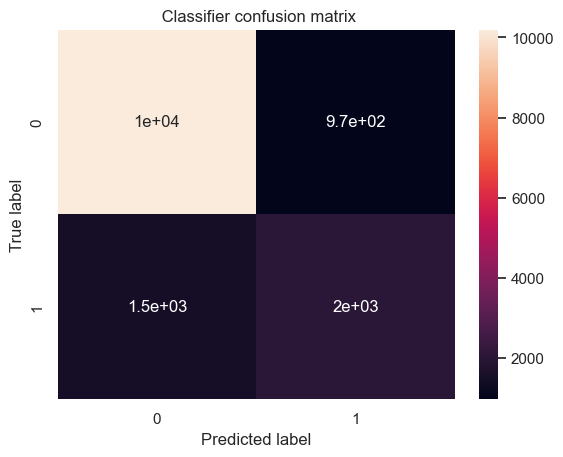

In [33]:
sns.heatmap(cfm, annot=True)
plt.title(' Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

   Interpretation:
- Around 23,566 class 0 data (<=50k) were predicted true to its label
- Around 4,550 class 1 data (>50k) were predicted true to its label. 
- Around 3,650  class 1 data (>50k) were incorrectly predicted as 0 (<50k)
- Around 2,422 class 0 (<50k) data were incorrectly predicted as 1 (>50k). 


In [34]:
## Classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11166
           1       0.67      0.57      0.62      3487

    accuracy                           0.83     14653
   macro avg       0.77      0.74      0.75     14653
weighted avg       0.82      0.83      0.83     14653



   Interpretation:This is the next level report of the confusion matrix above where we can see the performance metrics of the model in percentage. 
    
- Precision (class 0): out of the total people that the model predicted that they had income <=50k, 87% of them actually do. 
- Recall (class 0) : out of all the people who do have income <=50k, the model was able to predict 91% of those people. 
- Precision (class 1): out of the total people that the model predicted that they had income >50k, 65% of those actually do. 
- Recall (class 1): out of all the people who do have income >50k, the model was only able predicted 55% of them.




   Overall, the performance metrics report is showing that the model is doing pretty well. There is a quite low 'recall' of class 1. The unbalanced in the number of data between the 2 classes might cause this problem (The number of <=50k is 3 times larger then the number of >50k). Also, doing feature selection might help increase the metrics as well. 

#### B. Ultimately, would you recommend the US government use this model to understand if the pay is equal? This should be a minimum. paragraph discussion and should require outside reading about the current state of equal pay and if the distribution of pay is based on the factors in the dataset.

I would recommend the US government use this model to understand if the pay is equal.Firstly, The model has a pretty good accuracy score (82,23%), as well as precision, recall metrics. When analyzing income inequality, researchers commonly study distributions based on gender, ethnicity, geographic location,age, and occupation [2]. Secondly, in our model, gender, education_num, age are having the highest correlations with the salary variable. Lastly, study shows that the gender pay gap in the United States has remained relatively stable over the past two decades. In 2022, women earned an average of 82% of what men earned, a small increase from 80% in 2002 [1]. Our analysis also support to the statement by finding that being a husband is correlated with earning over 50k, with a correlation coefficient of 0.4, and there is also a correlation between salary and male gender of 0.22. 

## Conclusion

The KNN model is doing well in predicting the people who have income >50k and <=50k with the highest accuracy at k=7 is 82,23%. We might improve the recall and precision metrics of class 1 (>50k) by solving the unbalanced dataset problem and implementing feature selection for the model. I need to do more researches and testing before coming to a conclusion.

This model could be use to understand the if the pay is equal by the US Government because it considers the same features that are using to study the income distribution by the researchers and the yields a good accuracy score of 82,23%. 

<h1><center>References</center></h1>


[1]Aragaoa,Carolina.(Mar 1, 2023).Gender pay gap in U.S. hasn’t changed much in two decades. https://www.pewresearch.org/fact-tank/2023/03/01/gender-pay-gap-facts/

[2]Kopp,Carol. (Nov 2, 2021). Income Inequality Definition: Examples and How It's Measured. Investopedia. Retrieved April 16,2023, from https://www.investopedia.com/terms/i/income-inequality.asp 

